In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movies_cols = ['MovieID','Title','Genres']
ratings_cols = ['UserID','MovieID','Rating','Timestamp']
users_cols = ['UserID','Gender','Age','Occupation','Zip-code']

In [3]:
movies = pd.read_csv('./movies.dat', sep = '::',header = None, names = movies_cols, encoding = 'latin 1')
ratings = pd.read_csv('./ratings.dat',sep = '::', header = None, names = ratings_cols)
users = pd.read_csv('./users.dat',sep = '::', header = None, names = users_cols)
                   

C:\conda_tmp\ipykernel_4760\1093694751.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies = pd.read_csv('./movies.dat', sep = '::',header = None, names = movies_cols, encoding = 'latin 1')
C:\conda_tmp\ipykernel_4760\1093694751.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_csv('./ratings.dat',sep = '::', header = None, names = ratings_cols)
C:\conda_tmp\ipykernel_4760\1093694751.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can a

In [4]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [6]:
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [7]:
merge_on_movieid = pd.merge(movies,ratings,on = 'MovieID').reset_index(drop = True)
merge_on_movieid.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [8]:
merge_on_userid = pd.merge(merge_on_movieid, users, on = 'UserID').reset_index(drop = True)
merge_on_userid.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [9]:
data = merge_on_userid.drop(['Genres','Timestamp','Zip-code'],axis = 1)
data.head()

,MovieID,Title,UserID,Rating,Gender,Age,Occupation
0,1,Toy Story (1995),1,5,F,1,10
1,48,Pocahontas (1995),1,5,F,1,10
2,150,Apollo 13 (1995),1,5,F,1,10
3,260,Star Wars: Episode IV - A New Hope (1977),1,4,F,1,10
4,527,Schindler's List (1993),1,5,F,1,10


In [10]:
merge_on_userid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  int64 
 1   Title       1000209 non-null  object
 2   Genres      1000209 non-null  object
 3   UserID      1000209 non-null  int64 
 4   Rating      1000209 non-null  int64 
 5   Timestamp   1000209 non-null  int64 
 6   Gender      1000209 non-null  object
 7   Age         1000209 non-null  int64 
 8   Occupation  1000209 non-null  int64 
 9   Zip-code    1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 76.3+ MB


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

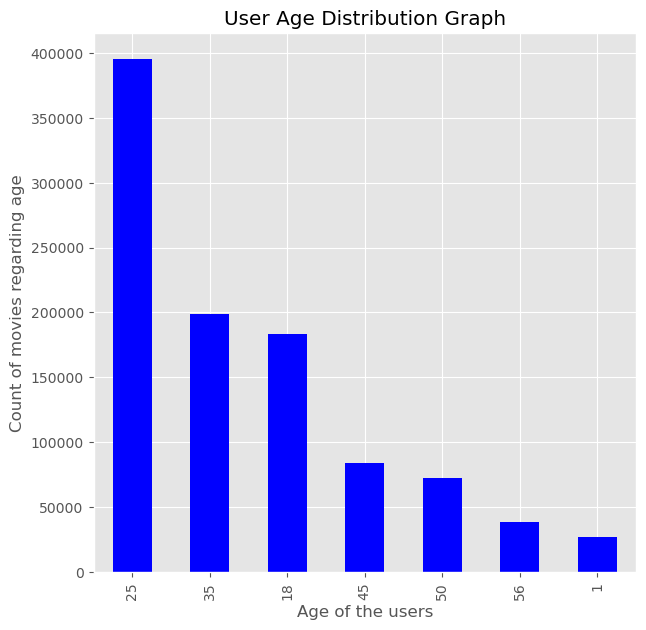

In [12]:
# user age distribution
style.use('ggplot')
plt.figure(figsize = (7,7))
data['Age'].value_counts().plot(kind = 'bar', color = 'blue')
plt.xlabel('Age of the users')
plt.ylabel('Count of movies regarding age')
plt.title('User Age Distribution Graph')
plt.show()

<Figure size 700x700 with 0 Axes>

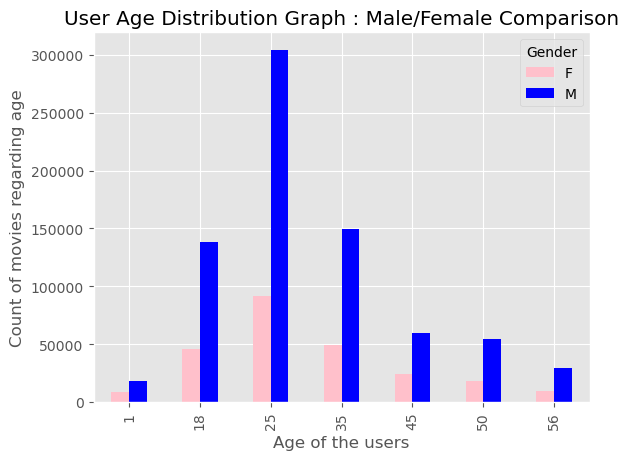

In [13]:
# user age distribution
plt.figure(figsize = (7,7))
data.groupby('Age')['Gender'].value_counts().unstack().plot(kind = 'bar',color = ['pink','blue'])
plt.xlabel('Age of the users')
plt.ylabel('Count of movies regarding age')
plt.title('User Age Distribution Graph : Male/Female Comparison')
plt.show()

C:\conda_tmp\ipykernel_4760\2600861639.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'],hist = False)


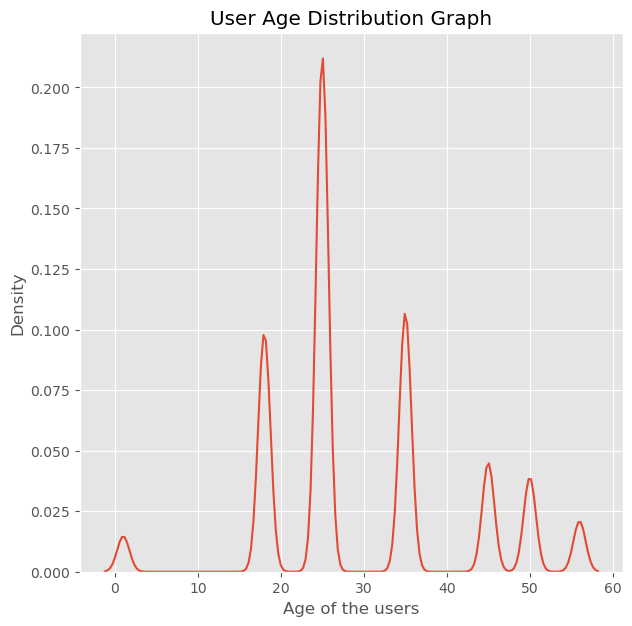

In [15]:
plt.figure(figsize = (7,7))
sns.distplot(data['Age'],hist = False)
plt.xlabel('Age of the users')
plt.ylabel('Density')
plt.title('User Age Distribution Graph')
plt.show()

In [16]:
toy_story = data[data['Title'] == 'Toy Story (1995)'].drop(['Occupation','Age','Gender','MovieID','UserID'],axis = 1)
toy_story.rename({'Title':'Toy Story'},axis = 1, inplace = True)
toy_story.head()

,Toy Story,Rating
0,Toy Story (1995),5
53,Toy Story (1995),4
124,Toy Story (1995),4
263,Toy Story (1995),5
369,Toy Story (1995),5


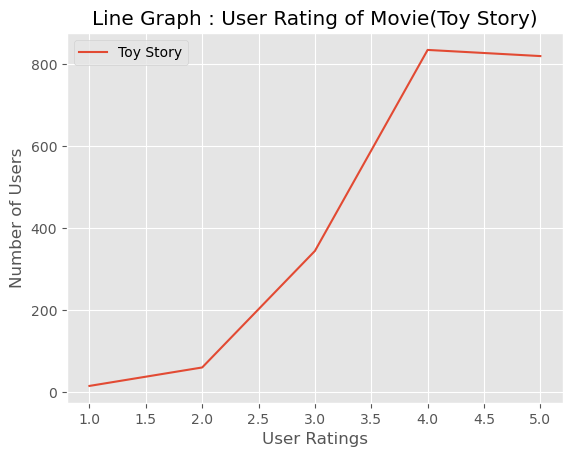

In [17]:
toy_story.groupby('Rating').count().plot(kind='line')
plt.title('Line Graph : User Rating of Movie(Toy Story)')
plt.xlabel('User Ratings')
plt.ylabel('Number of Users')
plt.show()

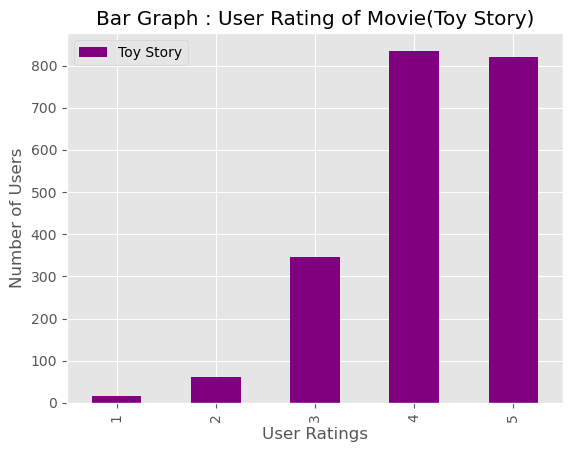

In [18]:
toy_story.groupby('Rating').count().plot(kind='bar', color = 'purple')
plt.title('Bar Graph : User Rating of Movie(Toy Story)')
plt.xlabel('User Ratings')
plt.ylabel('Number of Users')
plt.show()

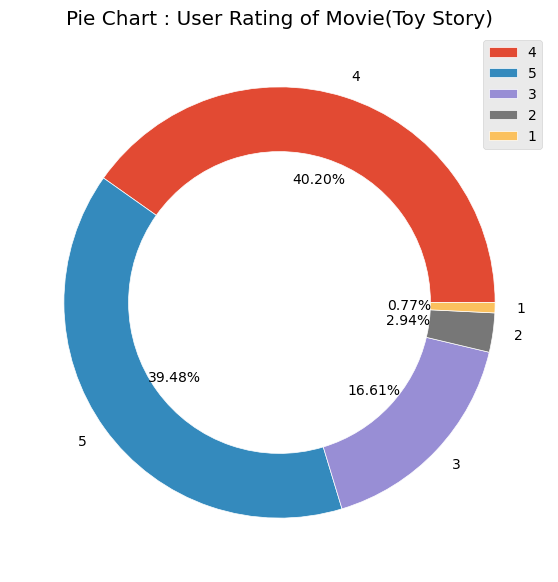

In [19]:
plt.figure(figsize=(7,7))
plt.pie(list(toy_story['Rating'].value_counts()),
        labels=list(toy_story['Rating'].value_counts().keys()),
        wedgeprops=dict(width=0.3, edgecolor='w'), autopct = '%0.2f%%', radius=1)
plt.title('Pie Chart : User Rating of Movie(Toy Story)')
plt.legend()
plt.show()

#### Above Graphs Show that most of the viewers have given 4 stars and 5 stars to the movie. There are very few viewers who have provides 1 or 2 stars to the movie. 

In [20]:
# Top 25 movies by viewership ratings

In [21]:
top_25 = data.groupby('Title')['Rating'].mean().round(2).sort_values(ascending = False)[:25]
top_25

Title
Bittersweet Motel (2000)                                               5.00
Baby, The (1973)                                                       5.00
Ulysses (Ulisse) (1954)                                                5.00
Lured (1947)                                                           5.00
Song of Freedom (1936)                                                 5.00
Follow the Bitch (1998)                                                5.00
Schlafes Bruder (Brother of Sleep) (1995)                              5.00
Smashing Time (1967)                                                   5.00
Gate of Heavenly Peace, The (1995)                                     5.00
One Little Indian (1973)                                               5.00
I Am Cuba (Soy Cuba/Ya Kuba) (1964)                                    4.80
Lamerica (1994)                                                        4.75
Apple, The (Sib) (1998)                                                4.67
Sanjur

In [22]:
# Find the ratings for all the movies reviewed by for a particular user of user id = 2696
user_id = data[data['UserID']==2696].drop(['Occupation','Age','Gender','UserID'],axis = 1).reset_index(drop=True)
user_id

,MovieID,Title,Rating
0,350,"Client, The (1994)",3
1,800,Lone Star (1996),5
2,1092,Basic Instinct (1992),4
3,1097,E.T. the Extra-Terrestrial (1982),3
4,1258,"Shining, The (1980)",4
5,1270,Back to the Future (1985),2
6,1589,Cop Land (1997),3
7,1617,L.A. Confidential (1997),4
8,1625,"Game, The (1997)",4
9,1644,I Know What You Did Last Summer (1997),2


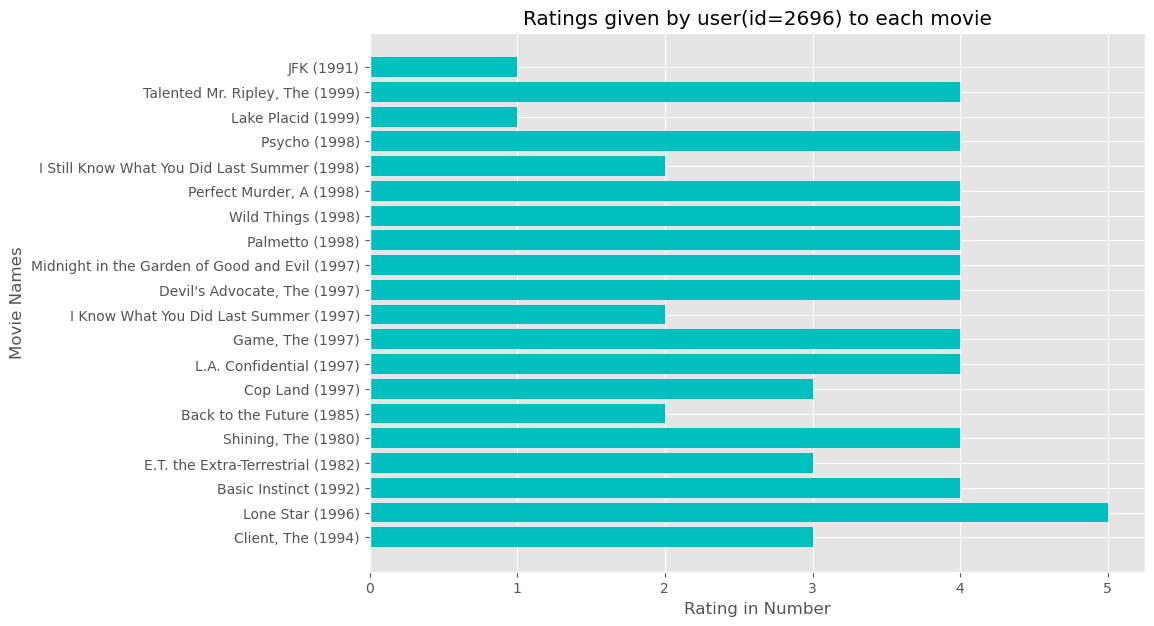

In [23]:
plt.figure(figsize=(10,7))
plt.barh(user_id['Title'],user_id['Rating'],color='c')
plt.title('Ratings given by user(id=2696) to each movie')
plt.xlabel('Rating in Number')
plt.ylabel('Movie Names')
plt.show()

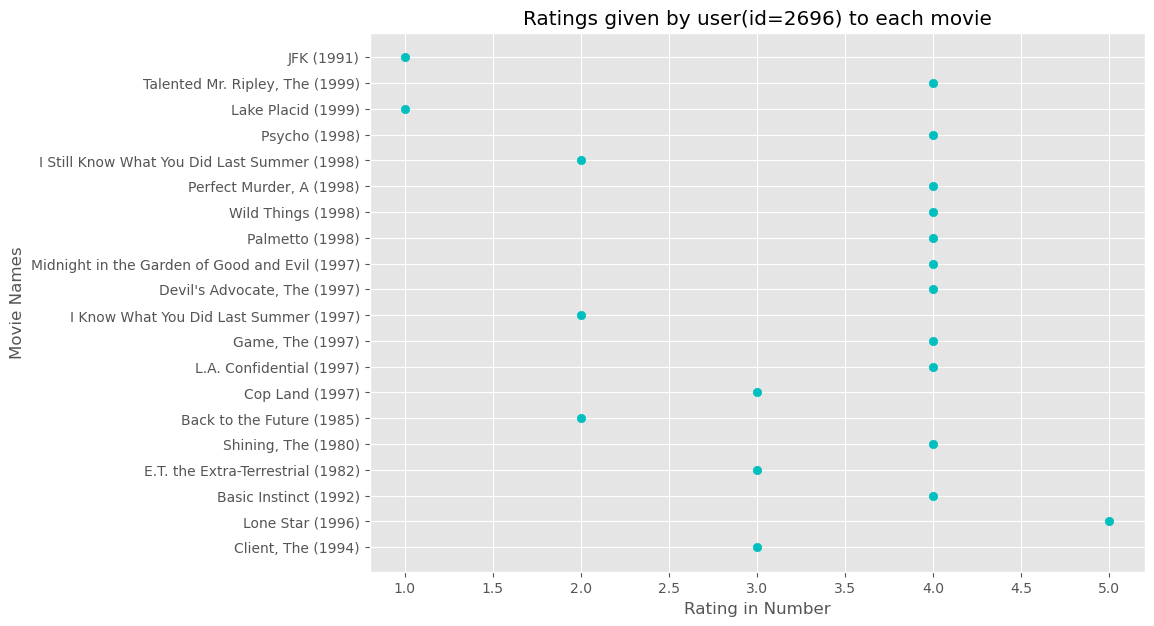

In [24]:
plt.figure(figsize=(10,7))
plt.scatter(user_id['Rating'],user_id['Title'],color='c')
plt.title('Ratings given by user(id=2696) to each movie')
plt.xlabel('Rating in Number')
plt.ylabel('Movie Names')
plt.show()

In [25]:
# Find out all the unique genres 
genres = list(movies['Genres'].unique())

In [26]:
temp = []
unique_genres = set()
for i in range(len(genres)):
    temp = genres[i].split('|')
    for j in range(len(temp)):
        unique_genres.add(temp[j])
print('Unique Genres -- ',list(unique_genres))

Unique Genres --  ['Romance', 'Drama', 'War', 'Sci-Fi', 'Fantasy', 'Film-Noir', 'Western', 'Horror', 'Mystery', 'Action', 'Crime', 'Musical', 'Thriller', 'Documentary', 'Animation', 'Adventure', "Children's", 'Comedy']


In [27]:
# One Hot Encoding
data

,MovieID,Title,UserID,Rating,Gender,Age,Occupation
0,1,Toy Story (1995),1,5,F,1,10
1,48,Pocahontas (1995),1,5,F,1,10
2,150,Apollo 13 (1995),1,5,F,1,10
3,260,Star Wars: Episode IV - A New Hope (1977),1,4,F,1,10
4,527,Schindler's List (1993),1,5,F,1,10
...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),5727,4,M,25,4
1000205,3535,American Psycho (2000),5727,2,M,25,4
1000206,3536,Keeping the Faith (2000),5727,5,M,25,4
1000207,3555,U-571 (2000),5727,3,M,25,4


In [28]:
for i in list(unique_genres):
    data[i] = merge_on_userid['Genres'].str.contains(i)*1

In [29]:
data.head()

,MovieID,Title,UserID,Rating,Gender,Age,Occupation,Romance,Drama,War,...,Mystery,Action,Crime,Musical,Thriller,Documentary,Animation,Adventure,Children's,Comedy
0,1,Toy Story (1995),1,5,F,1,10,0,0,0,...,0,0,0,0,0,0,1,0,1,1
1,48,Pocahontas (1995),1,5,F,1,10,1,0,0,...,0,0,0,1,0,0,1,0,1,0
2,150,Apollo 13 (1995),1,5,F,1,10,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),1,4,F,1,10,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,527,Schindler's List (1993),1,5,F,1,10,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [31]:
first_500 = data[500:]
first_500.dropna(inplace=True)

C:\conda_tmp\ipykernel_4760\827190239.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_500.dropna(inplace=True)


In [32]:
features = first_500[['MovieID','Age','Occupation']].values

In [33]:
labels = first_500[['Rating']].values

In [34]:
train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.33,random_state=42)

Text(0.5, 0, 'Ratings')

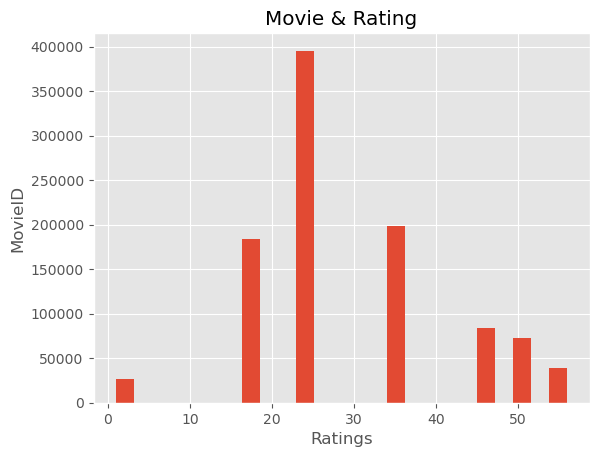

In [35]:
data.Age.plot.hist(bins=25)
plt.title("Movie & Rating")
plt.ylabel('MovieID')
plt.xlabel('Ratings')

In [36]:
logreg = LogisticRegression()
logreg.fit(train, train_labels)
Y_pred = logreg.predict(test)
acc_log = round(logreg.score(train, train_labels) * 100, 2)
acc_log

c:\Users\Tejpratap\anaconda3\envs\myenv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Tejpratap\anaconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


34.9

In [37]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train, train_labels)
Y_pred = knn.predict(test)
acc_knn = round(knn.score(train, train_labels) * 100, 2)
acc_knn

c:\Users\Tejpratap\anaconda3\envs\myenv\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


44.91

In [38]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, train_labels)
Y_pred = decision_tree.predict(test)
acc_decision_tree = round(decision_tree.score(train, train_labels) * 100, 2)
acc_decision_tree

56.6

In [39]:
models = pd.DataFrame({
    'Model': [ 'KNN', 'Logistic Regression', 
              'Decision Tree'],
    'Score': [ acc_knn, acc_log, 
               acc_decision_tree]})
models.sort_values(by='Score', ascending=False)


,Model,Score
2,Decision Tree,56.60
0,KNN,44.91
1,Logistic Regression,34.90
